## Importación de datos

In [679]:
import pandas as pd
import sys
import os
# Agregamos la carpeta raiz al proyecto
# Para que el notebook pueda acceder a archivos que estan por encima o a la par de el como src
root_path = os.path.abspath("..")
sys.path.append(root_path)

In [680]:
df_train = pd.read_csv(r"C:\ml\credit_risk\PROYECTO_CREDIT_RISK\DATA\vista_modelo_riesgo.csv") #Datos que usaremos para entrenar nuestro modelo
df_test = pd.read_csv(r"C:\ml\credit_risk\PROYECTO_CREDIT_RISK\DATA\vista_modelo_produccion.csv") #Datos suministrados por Kaggle como test, los usaremos para la aplicación del modelo de prediccion ya que no tienen target


In [681]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID_CLIENTE                         307511 non-null  int64  
 1   TARGET                             307511 non-null  int64  
 2   INGRESO_TOTAL                      307511 non-null  float64
 3   MONTO_SOLICITADO                   307511 non-null  float64
 4   GENERO                             307511 non-null  object 
 5   TIENE_CARRO                        307511 non-null  object 
 6   TIENE_CASA                         307511 non-null  object 
 7   NUM_HIJOS                          307511 non-null  int64  
 8   NIVEL_EDUCATIVO                    307511 non-null  object 
 9   ESTADO_CIVIL                       307511 non-null  object 
 10  TIPO_INGRESO                       307511 non-null  object 
 11  OCUPACION                          2111

In [682]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         48744 non-null  int64  
 1   INGRESO_TOTAL                      48744 non-null  float64
 2   MONTO_SOLICITADO                   48744 non-null  float64
 3   GENERO                             48744 non-null  object 
 4   TIENE_CARRO                        48744 non-null  object 
 5   TIENE_CASA                         48744 non-null  object 
 6   NUM_HIJOS                          48744 non-null  int64  
 7   NIVEL_EDUCATIVO                    48744 non-null  object 
 8   ESTADO_CIVIL                       48744 non-null  object 
 9   TIPO_INGRESO                       48744 non-null  object 
 10  OCUPACION                          33139 non-null  object 
 11  RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL  48720 non-null  flo

## Rellenado de valores nulos

In [683]:
#Verificamos cuantos valores nulos tenemos para decidir cual metódo de llenado usamos
print(df_train["RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL"].isnull().sum()) 
print(df_test["RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL"].isnull().sum()) # no son muchos


12
24


In [684]:
#Verificamos cuantos valores nulos tenemos para decidir cual metódo de llenado usamos
print(df_train["MORA_TOTAL_ACTUAL"].isnull().sum()) #Son muchos los registros con valores nulos, al revisar la base de datos en SQLite, me doy cuenta de que dichos valores nulos representab 0 de mora 
print(df_test["MORA_TOTAL_ACTUAL"].isnull().sum()) 

44020
6424


In [685]:
#Sucede lo mismo que con la mora total, los valores nulos representan 0 en el promedio de la deuda promedio
print(df_train["PROMEDIO_DEUDA_EXTERNA"].isnull().sum()) 
print(df_test["PROMEDIO_DEUDA_EXTERNA"].isnull().sum())

44021
6425


In [686]:
print(df_train["GENERO"].value_counts()) # En el genero no hay valores nulos, pero si valores "XNA" que hay que remplazar
print(df_test["GENERO"].value_counts()) #el dataframe de test no tiene, no debemos aplicarle la funcion de limpieza

GENERO
F      202448
M      105059
XNA         4
Name: count, dtype: int64
GENERO
F    32678
M    16066
Name: count, dtype: int64


In [687]:
from src.limpieza import rellenar_ocupacion

df_train = rellenar_ocupacion(df_train)
df_test = rellenar_ocupacion(df_test)

from src.limpieza import rellenar_ratio
df_train = rellenar_ratio(df_train)
df_test = rellenar_ratio(df_test)

from src.limpieza import rellenar_mora_actual
df_train = rellenar_mora_actual(df_train)
df_test = rellenar_mora_actual(df_test)

from src.limpieza import rellenar_promedio_deuda_externa

df_train = rellenar_promedio_deuda_externa(df_train)
df_test = rellenar_promedio_deuda_externa(df_test)

from src.limpieza import rellenar_veces_ha_pedido_prorroga

df_train = rellenar_veces_ha_pedido_prorroga(df_train)
df_test = rellenar_veces_ha_pedido_prorroga(df_test)

from src.limpieza import rellenar_genero

df_train = rellenar_genero(df_train)



In [688]:
#Verificamos que no contemos con valores nulos luego de realizar el rellenado
print(df_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID_CLIENTE                         307511 non-null  int64  
 1   TARGET                             307511 non-null  int64  
 2   INGRESO_TOTAL                      307511 non-null  float64
 3   MONTO_SOLICITADO                   307511 non-null  float64
 4   GENERO                             307511 non-null  object 
 5   TIENE_CARRO                        307511 non-null  object 
 6   TIENE_CASA                         307511 non-null  object 
 7   NUM_HIJOS                          307511 non-null  int64  
 8   NIVEL_EDUCATIVO                    307511 non-null  object 
 9   ESTADO_CIVIL                       307511 non-null  object 
 10  TIPO_INGRESO                       307511 non-null  object 
 11  OCUPACION                          3075

In [689]:
#Verificamos que no contemos con valores nulos luego de realizar el rellenado
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         48744 non-null  int64  
 1   INGRESO_TOTAL                      48744 non-null  float64
 2   MONTO_SOLICITADO                   48744 non-null  float64
 3   GENERO                             48744 non-null  object 
 4   TIENE_CARRO                        48744 non-null  object 
 5   TIENE_CASA                         48744 non-null  object 
 6   NUM_HIJOS                          48744 non-null  int64  
 7   NIVEL_EDUCATIVO                    48744 non-null  object 
 8   ESTADO_CIVIL                       48744 non-null  object 
 9   TIPO_INGRESO                       48744 non-null  object 
 10  OCUPACION                          48744 non-null  object 
 11  RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL  48744 non-null  obj

In [690]:
#Tenemos damasiadas categorias en ocuación, reduzcamoslas a solo 2 para simplificar el categorical encoding usando la funcion de limpieza 
df_train["OCUPACION"].value_counts()

OCUPACION
SIN_OCUPACION            96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [691]:
from src.limpieza import reducir_ocupaciones
df_train = reducir_ocupaciones(df_train)
df_test = reducir_ocupaciones(df_test)

## Analisis exploratorio

In [692]:
import matplotlib.pyplot as plt
import seaborn as sns

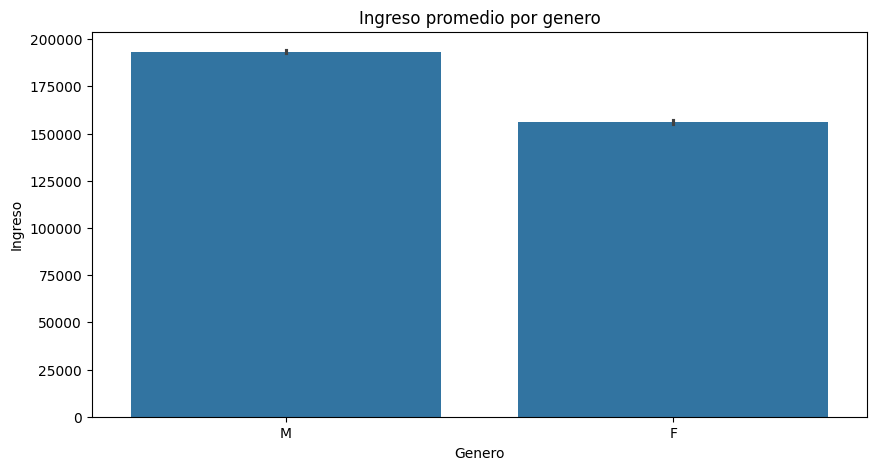

In [693]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_train,x="GENERO",y="INGRESO_TOTAL")
plt.title("Ingreso promedio por genero")
plt.xlabel("Genero")
plt.ylabel("Ingreso")
plt.show()
#Aunque hay muchas más mujeres, el ingreso promedio de los hombres es mayor

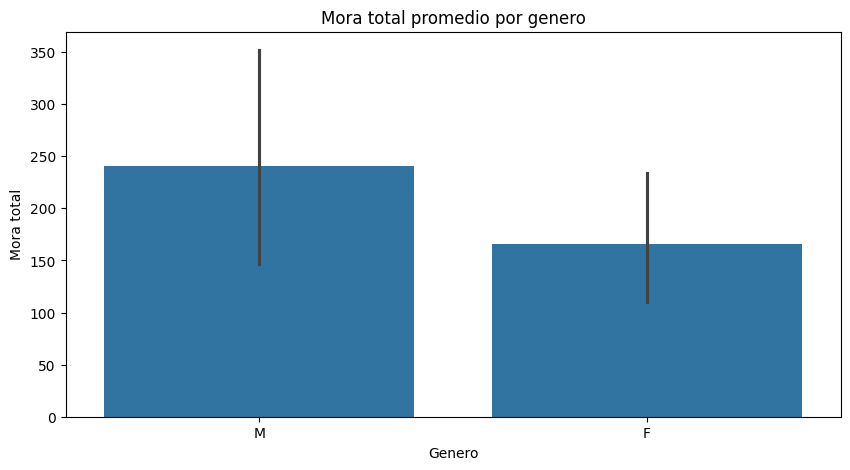

In [694]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_train,x="GENERO",y="MORA_TOTAL_ACTUAL")
plt.title("Mora total promedio por genero")
plt.xlabel("Genero")
plt.ylabel("Mora total")
plt.show()
#Los hombres en promedio son los que deben más en otros bancos

<Figure size 1500x1000 with 0 Axes>

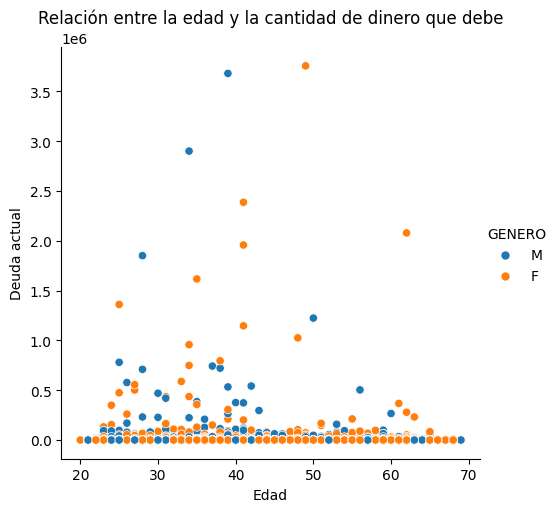

In [695]:
plt.figure(figsize=(15,10))
sns.relplot(data=df_train,x="EDAD_YEARS",y="MORA_TOTAL_ACTUAL", hue="GENERO")
plt.title("Relación entre la edad y la cantidad de dinero que debe")
plt.xlabel("Edad")
plt.ylabel("Deuda actual")
plt.show()
# Esta muestra la relación real entre la edad y la deuda actual, pero los valores extremos (deudas muy altas) aplastan la escala y dificultan ver el patrón general, no elimino los valores grandes ya que pueden ser utiles para nuestro modelo de predicción


<Figure size 1500x1000 with 0 Axes>

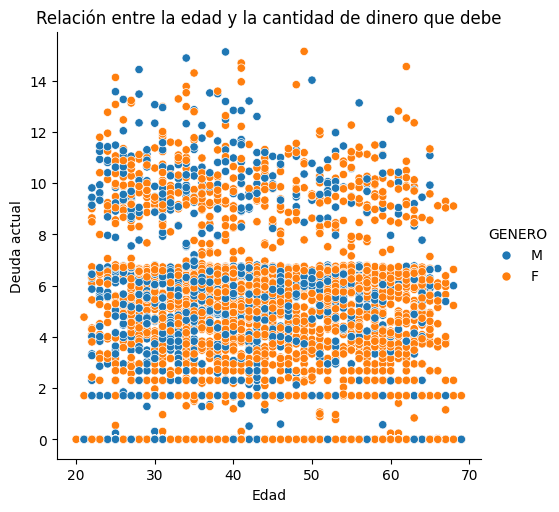

In [696]:
import numpy as np
df_train["MORA_LOG"] = np.log1p(df_train["MORA_TOTAL_ACTUAL"])
plt.figure(figsize=(15,10))
sns.relplot(data=df_train,x="EDAD_YEARS",y="MORA_LOG", hue="GENERO")
plt.title("Relación entre la edad y la cantidad de dinero que debe")
plt.xlabel("Edad")
plt.ylabel("Deuda actual")
plt.show()
# En esta aplicamos log1p a la deuda para reducir el impacto de valores extremos, mejorar la visualización y entender mejor la distribución/patrón general sin eliminar datos

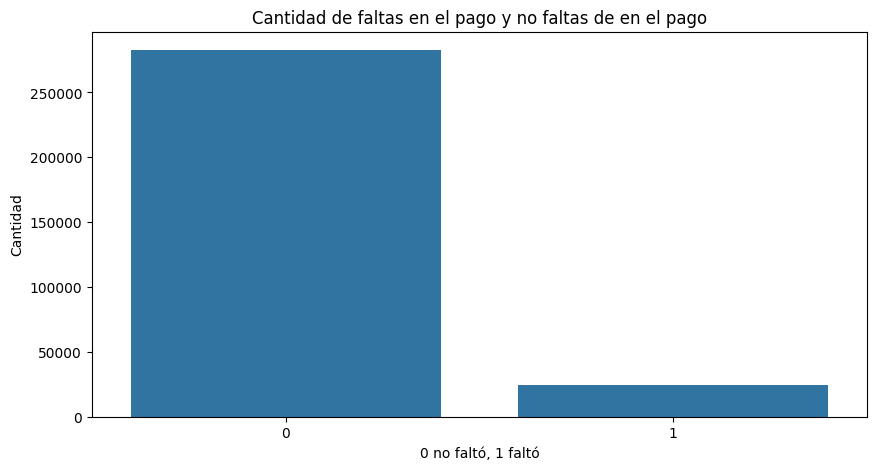

In [697]:
#Verificamos si nuestros datos estan desbalanceados
plt.figure(figsize=(10,5))
sns.countplot(data=df_train,x="TARGET")
plt.title("Cantidad de faltas en el pago y no faltas de en el pago")
plt.xlabel("0 no faltó, 1 faltó")
plt.ylabel("Cantidad")
plt.show()
#Nuestros datos están suamamente desbalanceados, podria recomendar aplicar oversampling ya que tenemos muchos registros

Text(0, 0.5, 'Cantidad')

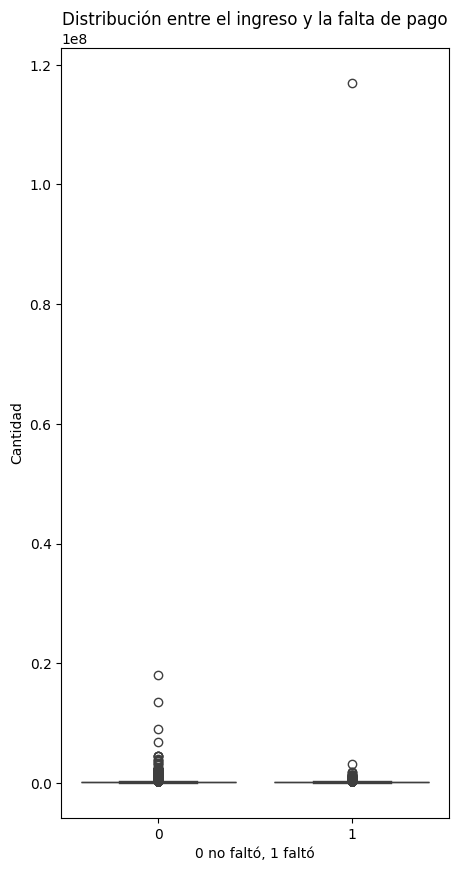

In [698]:
#Miremos si la gente que falta en el pago tiene una distribución ingreso distinto a la gente que no falla
plt.figure(figsize=(5,10))
sns.boxplot(data=df_train,x="TARGET", y= "INGRESO_TOTAL")
plt.title("Distribución entre el ingreso y la falta de pago")
plt.xlabel("0 no faltó, 1 faltó")
plt.ylabel("Cantidad")

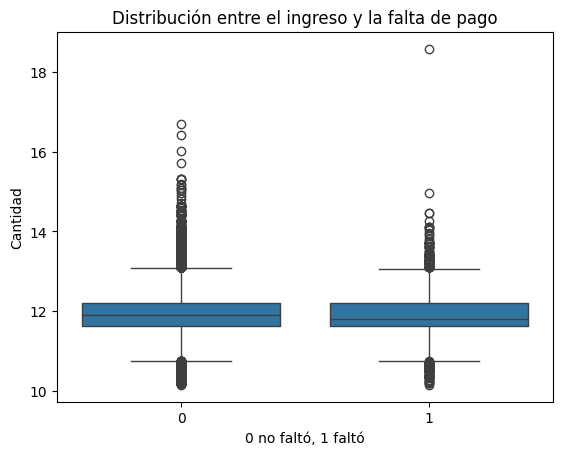

In [699]:
#Debido a las diferencias entre las escalas, no podemos apreciar bien el contenido, por eso vuelvo a aplicar log1p a los ingresos totales
df_train["INGRESO_LOG"] = np.log1p(df_train["INGRESO_TOTAL"])
sns.boxplot(data=df_train, x="TARGET", y="INGRESO_LOG")
plt.title("Distribución entre el ingreso y la falta de pago")
plt.xlabel("0 no faltó, 1 faltó")
plt.ylabel("Cantidad")
plt.show()
#podemos ver que los que faltan al pago y los que no, tienen una mediana algo diferentes, pero los Q1 a Q3 son bastante parecidos, ambos tienen "outliers"

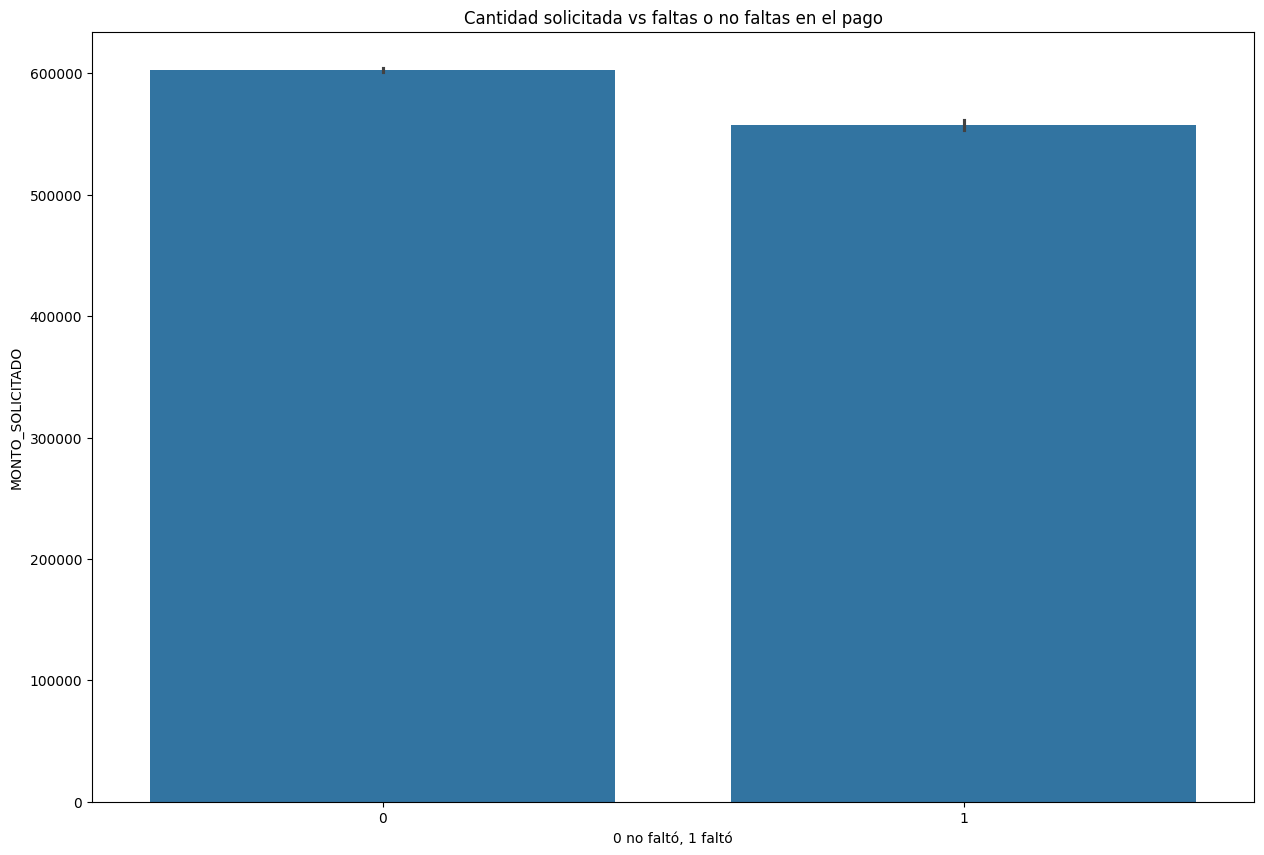

In [700]:
#Miremos en promedio cuanto pide cada uno de los segmentos de personas que fallan o no fallan en el pago
plt.figure(figsize=(15,10))
sns.barplot(data=df_train,x="TARGET",y="MONTO_SOLICITADO")
plt.title("Cantidad solicitada vs faltas o no faltas en el pago")
plt.xlabel("0 no faltó, 1 faltó")
plt.show()
#Bastante parecidas las cantidades, parece no importar mucho la cantidad solicitada al momento de faltar en el pago, IMPORTANTE!!!!!!

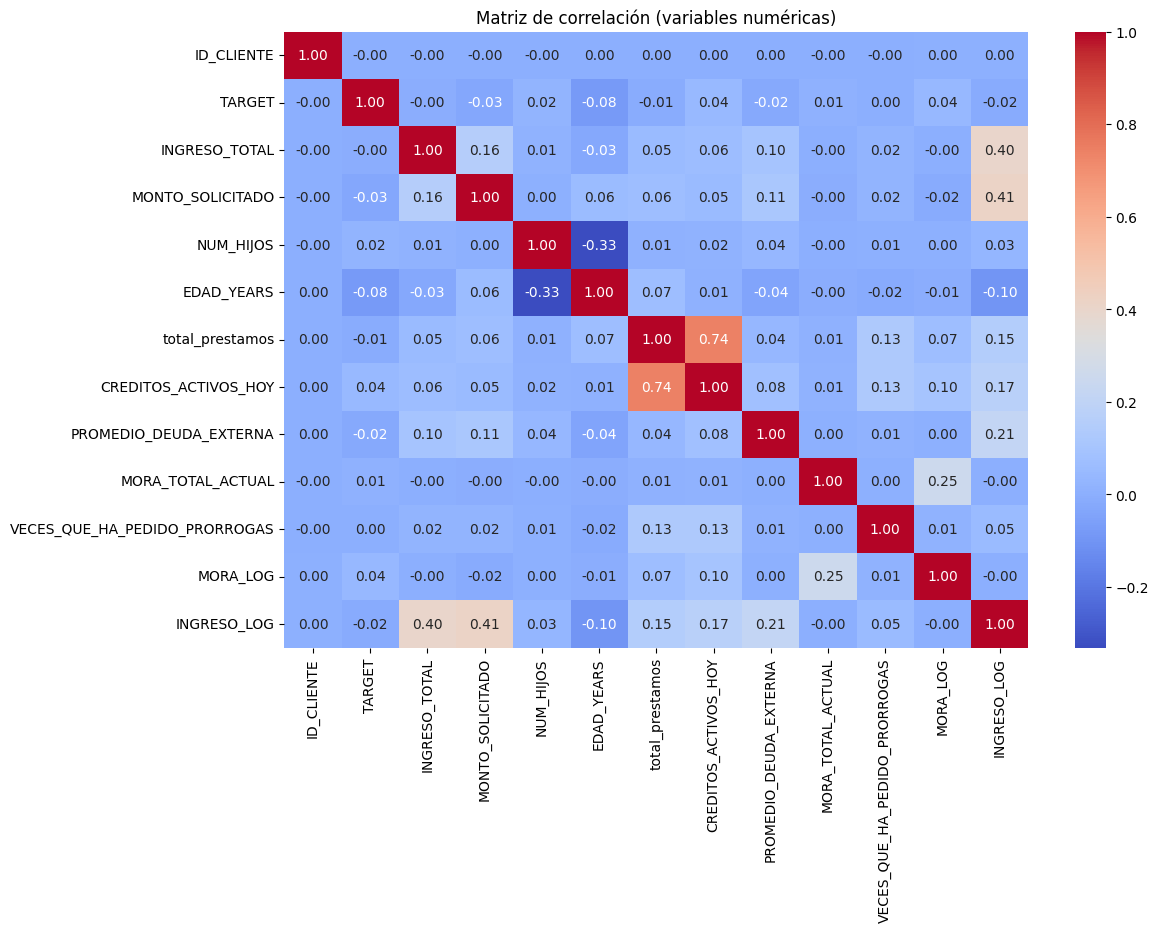

In [701]:
corr = df_train.select_dtypes(include=["int64", "float64"]).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación (variables numéricas)")
plt.show()
#No notamos autocorrelaciones entre variables que no expresen lo mismo demasiado grandes.

In [702]:
#plt.figure(figsize=(15,10))
#sns.barplot(data=df,x="TARGET",y="RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL")
#plt.title("Ratio entre cuota e ingreso vs faltas o no faltas en el pago")
#plt.xlabel("0 no faltó, 1 faltó")
#plt.show()


## Balanceo y preparación de datos para el modelo de predicción

### Balanceo de datos

In [703]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

In [704]:
#los datos que debemos balancear son los datos de entrenamiento, por lo que para simplicar las cosas df_train durante el balanceo se llamará df
df = df_train
#Preparación de datos
df_vf = df[[
    "ID_CLIENTE",
    "TARGET",
    "INGRESO_TOTAL",
    "MONTO_SOLICITADO",
    "GENERO",
    "TIENE_CARRO",
    "TIENE_CASA",
    "NUM_HIJOS",
    "NIVEL_EDUCATIVO",
    "ESTADO_CIVIL",
    "TIPO_INGRESO",
    "OCUPACION",
    "RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL",
    "EDAD_YEARS",
    "total_prestamos",
    "CREDITOS_ACTIVOS_HOY",
    "PROMEDIO_DEUDA_EXTERNA",
    "MORA_TOTAL_ACTUAL",
    "VECES_QUE_HA_PEDIDO_PRORROGAS"
]] #Nos traemos las variables de muestrp dataset, sin las log1p ya que esas solo se usaron para la visualización

X = df_vf.drop("TARGET", axis = 1) #En las variables independientes dejamos todas menos lo que queremos predecir, en este caso quitamos el target con .drop
y = df_vf["TARGET"] # En la variable dependiente dejamos la que queremos predecir, en este caso target

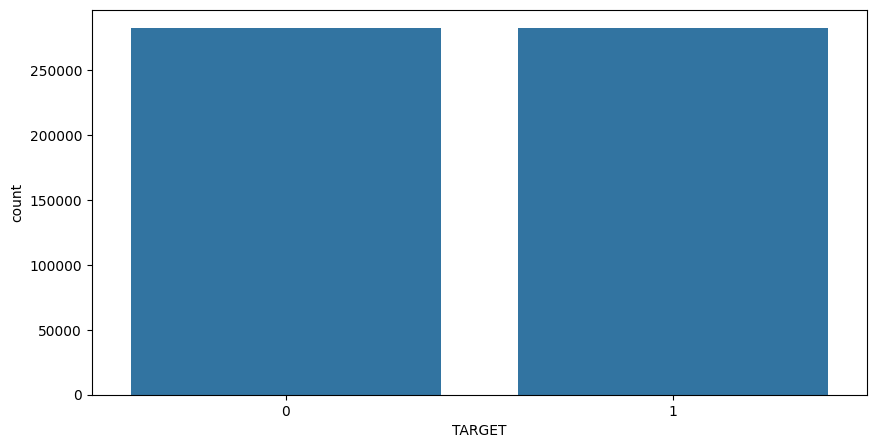

In [705]:
#Balanceo por oversampling
oversampler = RandomOverSampler(random_state=0) #Creamos una instancia de nuestro randomoversampler para hacer el sobremuestreo
X_oversampled, y_oversampled = oversampler.fit_resample(X,y) #Aplicamos el metodo .fit_resample para obtener nuestas X e y ya oversampleadas
df_oversampled = pd.concat([X_oversampled,y_oversampled],axis=1) #Unimos todo en un solo df
plt.figure(figsize=(10,5)) 
sns.countplot(data = df_oversampled, x="TARGET") #Creamos un countplot para ver el balanceo
plt.show()

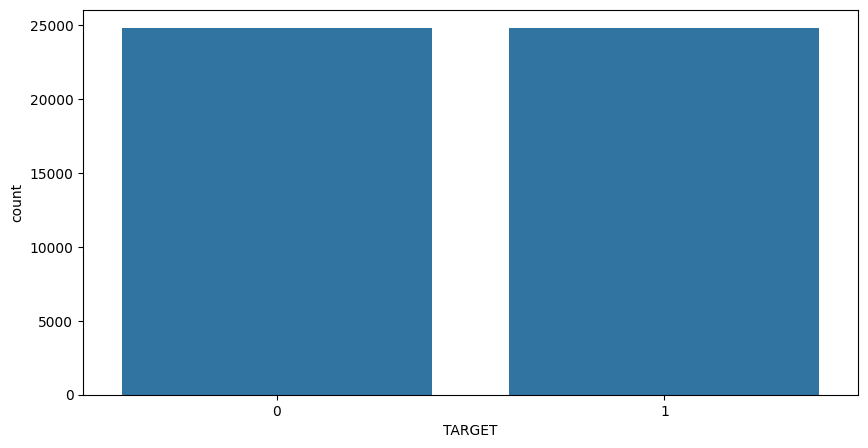

In [706]:
#Balanceo por undersamplig
undersampler = RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = undersampler.fit_resample(X,y)
df_undersampled = pd.concat([X_undersampled,y_undersampled], axis=1)
plt.figure(figsize=(10,5))
sns.countplot(data=df_undersampled,x="TARGET")
plt.show()

### Categorical encoding

#### Para el dataframe oversampleado

In [707]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [708]:
#Definimos las columnas categoricas a las cuales queremos aplicar Onehotencoding
cat_cols = [
    "GENERO",
    "TIENE_CARRO",
    "TIENE_CASA",
    "NIVEL_EDUCATIVO",
    "ESTADO_CIVIL",
    "TIPO_INGRESO",
    "OCUPACION",
]


In [709]:
#Creamos una instancia del onehotencoder para luego usarlo
ohe = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=True
)

X_oversampled_cat = ohe.fit_transform(X_oversampled[cat_cols].astype(str)) # Aplicamos el categorical encoding llenandolo en una matriz 

print(f"{X_oversampled_cat.shape}, esta tiene más columnas por que se crearon más columnas a partir del onehotencoding")
print(X_oversampled.shape)


(565372, 27), esta tiene más columnas por que se crearon más columnas a partir del onehotencoding
(565372, 18)


In [710]:
cat_feature_names = ohe.get_feature_names_out(cat_cols) #Sacamos el nombre de todas las nuevas columnas que creamos

#Volvemos esta matriz un data frame de pandas y le ponemos nombre a las columnas con el nombre de las columnas que extraimos justo arriba
X_oversampled_cat = pd.DataFrame( 
    X_oversampled_cat.toarray(),
    columns=cat_feature_names,
    index=X_oversampled.index
)


In [711]:
#concatenamos el dataframe original y el dataframe con el categorical encoding
X_oversampled= pd.concat([X_oversampled,X_oversampled_cat], axis=1)

In [712]:
#Eliminamos las columnas categoricas originales, ya que ta tenemos las categoricas listas a partir del categorical encoding
X_oversampled = X_oversampled.drop(cat_cols,axis=1)

In [713]:
X_oversampled.columns

Index(['ID_CLIENTE', 'INGRESO_TOTAL', 'MONTO_SOLICITADO', 'NUM_HIJOS',
       'RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL', 'EDAD_YEARS', 'total_prestamos',
       'CREDITOS_ACTIVOS_HOY', 'PROMEDIO_DEUDA_EXTERNA', 'MORA_TOTAL_ACTUAL',
       'VECES_QUE_HA_PEDIDO_PRORROGAS', 'GENERO_F', 'GENERO_M',
       'TIENE_CARRO_N', 'TIENE_CARRO_Y', 'TIENE_CASA_N', 'TIENE_CASA_Y',
       'NIVEL_EDUCATIVO_Academic degree', 'NIVEL_EDUCATIVO_Higher education',
       'NIVEL_EDUCATIVO_Incomplete higher', 'NIVEL_EDUCATIVO_Lower secondary',
       'NIVEL_EDUCATIVO_Secondary / secondary special',
       'ESTADO_CIVIL_Civil marriage', 'ESTADO_CIVIL_Married',
       'ESTADO_CIVIL_Separated', 'ESTADO_CIVIL_Single / not married',
       'ESTADO_CIVIL_Unknown', 'ESTADO_CIVIL_Widow',
       'TIPO_INGRESO_Businessman', 'TIPO_INGRESO_Commercial associate',
       'TIPO_INGRESO_Maternity leave', 'TIPO_INGRESO_Pensioner',
       'TIPO_INGRESO_State servant', 'TIPO_INGRESO_Student',
       'TIPO_INGRESO_Unemployed', 'TIPO_I

In [714]:
#volvemos a unir todo en un solo dataframe oversampleado
df_oversampled = pd.concat([X_oversampled,y_oversampled],axis=1)
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565372 entries, 0 to 565371
Data columns (total 39 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   ID_CLIENTE                                     565372 non-null  int64  
 1   INGRESO_TOTAL                                  565372 non-null  float64
 2   MONTO_SOLICITADO                               565372 non-null  float64
 3   NUM_HIJOS                                      565372 non-null  int64  
 4   RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL              565372 non-null  object 
 5   EDAD_YEARS                                     565372 non-null  int64  
 6   total_prestamos                                565372 non-null  int64  
 7   CREDITOS_ACTIVOS_HOY                           565372 non-null  int64  
 8   PROMEDIO_DEUDA_EXTERNA                         565372 non-null  float64
 9   MORA_TOTAL_ACTUAL                    

In [715]:
col = "RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL"

# Convertir todo lo que no sea número a NaN
df_oversampled[col] = pd.to_numeric(df_oversampled[col], errors="coerce")

# Rellenar NaN con la media
df_oversampled[col] = df_oversampled[col].fillna(df_oversampled[col].mean())

#### Para el dataframe undersampleado

In [716]:
cat_cols = [
    "GENERO",
    "TIENE_CARRO",
    "TIENE_CASA",
    "NIVEL_EDUCATIVO",
    "ESTADO_CIVIL",
    "TIPO_INGRESO",
    "OCUPACION",
]


In [717]:
ohe = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=True
)

X_undersampled_cat = ohe.fit_transform(X_undersampled[cat_cols].astype(str))

print(f"{X_undersampled_cat.shape}, esta tiene más columnas por que se crearon más columnas a partir del onehotencoding")
print(X_undersampled.shape)

(49650, 26), esta tiene más columnas por que se crearon más columnas a partir del onehotencoding
(49650, 18)


In [718]:
cat_feature_names = ohe.get_feature_names_out(cat_cols)

X_undersampled_cat = pd.DataFrame(
    X_undersampled_cat.toarray(),
    columns=cat_feature_names,
    index=X_undersampled.index
)


In [719]:
X_undersampled_cat = pd.DataFrame(X_undersampled_cat)
X_undersampled= pd.concat([X_undersampled,X_undersampled_cat], axis=1)

In [720]:
X_undersampled = X_undersampled.drop(cat_cols,axis=1)

In [721]:
X_undersampled.columns

Index(['ID_CLIENTE', 'INGRESO_TOTAL', 'MONTO_SOLICITADO', 'NUM_HIJOS',
       'RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL', 'EDAD_YEARS', 'total_prestamos',
       'CREDITOS_ACTIVOS_HOY', 'PROMEDIO_DEUDA_EXTERNA', 'MORA_TOTAL_ACTUAL',
       'VECES_QUE_HA_PEDIDO_PRORROGAS', 'GENERO_F', 'GENERO_M',
       'TIENE_CARRO_N', 'TIENE_CARRO_Y', 'TIENE_CASA_N', 'TIENE_CASA_Y',
       'NIVEL_EDUCATIVO_Academic degree', 'NIVEL_EDUCATIVO_Higher education',
       'NIVEL_EDUCATIVO_Incomplete higher', 'NIVEL_EDUCATIVO_Lower secondary',
       'NIVEL_EDUCATIVO_Secondary / secondary special',
       'ESTADO_CIVIL_Civil marriage', 'ESTADO_CIVIL_Married',
       'ESTADO_CIVIL_Separated', 'ESTADO_CIVIL_Single / not married',
       'ESTADO_CIVIL_Unknown', 'ESTADO_CIVIL_Widow',
       'TIPO_INGRESO_Commercial associate', 'TIPO_INGRESO_Maternity leave',
       'TIPO_INGRESO_Pensioner', 'TIPO_INGRESO_State servant',
       'TIPO_INGRESO_Student', 'TIPO_INGRESO_Unemployed',
       'TIPO_INGRESO_Working', 'OCUPACION_

In [722]:
df_undersampled = df_undersampled.reset_index(drop=True) #reseteamos los indices del df

In [723]:
#volvemos a unir todo en un solo dataframe oversampleado
df_undersampled = pd.concat([X_undersampled,y_undersampled],axis=1)
df_undersampled.info()
# Este df no tiene la columna TIPO_INGRESO_Businessman ya que al ser undersampleado posiblemente se eliminaron los registros que contenian businessman en el tipo de ingreso

<class 'pandas.core.frame.DataFrame'>
Index: 49650 entries, 39451 to 307509
Data columns (total 38 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   ID_CLIENTE                                     49650 non-null  int64  
 1   INGRESO_TOTAL                                  49650 non-null  float64
 2   MONTO_SOLICITADO                               49650 non-null  float64
 3   NUM_HIJOS                                      49650 non-null  int64  
 4   RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL              49650 non-null  object 
 5   EDAD_YEARS                                     49650 non-null  int64  
 6   total_prestamos                                49650 non-null  int64  
 7   CREDITOS_ACTIVOS_HOY                           49650 non-null  int64  
 8   PROMEDIO_DEUDA_EXTERNA                         49650 non-null  float64
 9   MORA_TOTAL_ACTUAL                              496

In [724]:
col = "RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL"

# Convertir todo lo que no sea número a NaN
df_undersampled[col] = pd.to_numeric(df_undersampled[col], errors="coerce")

# Rellenar NaN con la media
df_undersampled[col] = df_undersampled[col].fillna(df_undersampled[col].mean())

#### Para el dataframe de produccion

In [725]:
df = df_test
#Preparación de datos
df_vf = df[[
    "ID_CLIENTE",
    "INGRESO_TOTAL",
    "MONTO_SOLICITADO",
    "GENERO",
    "TIENE_CARRO",
    "TIENE_CASA",
    "NUM_HIJOS",
    "NIVEL_EDUCATIVO",
    "ESTADO_CIVIL",
    "TIPO_INGRESO",
    "OCUPACION",
    "RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL",
    "EDAD_YEARS",
    "total_prestamos",
    "CREDITOS_ACTIVOS_HOY",
    "PROMEDIO_DEUDA_EXTERNA",
    "MORA_TOTAL_ACTUAL",
    "VECES_QUE_HA_PEDIDO_PRORROGAS"
]] #Nos traemos las variables de nuestro dataset, sin las log1p ya que esas solo se usaron para la visualización

In [726]:
#Definimos las columnas categoricas a las cuales queremos aplicar Onehotencoding
cat_cols = [
    "GENERO",
    "TIENE_CARRO",
    "TIENE_CASA",
    "NIVEL_EDUCATIVO",
    "ESTADO_CIVIL",
    "TIPO_INGRESO",
    "OCUPACION",
]


In [727]:
#Creamos una instancia del onehotencoder para luego usarlo
ohe = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=True
)

df_vf_cat = ohe.fit_transform(df_vf[cat_cols].astype(str)) # Aplicamos el categorical encoding llenandolo en una matriz 

print(f"{df_vf_cat.shape}, esta tiene más columnas por que se crearon más columnas a partir del onehotencoding")
print(df_vf.shape)


(48744, 25), esta tiene más columnas por que se crearon más columnas a partir del onehotencoding
(48744, 18)


In [728]:
cat_feature_names = ohe.get_feature_names_out(cat_cols) #Sacamos el nombre de todas las nuevas columnas que creamos

#Volvemos esta matriz un data frame de pandas y le ponemos nombre a las columnas con el nombre de las columnas que extraimos justo arriba
df_vf_cat = pd.DataFrame( 
    df_vf_cat.toarray(),
    columns=cat_feature_names,
    index=df_vf.index
)


In [729]:
#concatenamos el dataframe original y el dataframe con el categorical encoding
df_test= pd.concat([df_vf,df_vf_cat], axis=1)

In [730]:
#Eliminamos las columnas categoricas originales, ya que ta tenemos las categoricas listas a partir del categorical encoding
df_test = df_test.drop(cat_cols,axis=1)

In [731]:
df_test.columns

Index(['ID_CLIENTE', 'INGRESO_TOTAL', 'MONTO_SOLICITADO', 'NUM_HIJOS',
       'RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL', 'EDAD_YEARS', 'total_prestamos',
       'CREDITOS_ACTIVOS_HOY', 'PROMEDIO_DEUDA_EXTERNA', 'MORA_TOTAL_ACTUAL',
       'VECES_QUE_HA_PEDIDO_PRORROGAS', 'GENERO_F', 'GENERO_M',
       'TIENE_CARRO_N', 'TIENE_CARRO_Y', 'TIENE_CASA_N', 'TIENE_CASA_Y',
       'NIVEL_EDUCATIVO_Academic degree', 'NIVEL_EDUCATIVO_Higher education',
       'NIVEL_EDUCATIVO_Incomplete higher', 'NIVEL_EDUCATIVO_Lower secondary',
       'NIVEL_EDUCATIVO_Secondary / secondary special',
       'ESTADO_CIVIL_Civil marriage', 'ESTADO_CIVIL_Married',
       'ESTADO_CIVIL_Separated', 'ESTADO_CIVIL_Single / not married',
       'ESTADO_CIVIL_Widow', 'TIPO_INGRESO_Businessman',
       'TIPO_INGRESO_Commercial associate', 'TIPO_INGRESO_Pensioner',
       'TIPO_INGRESO_State servant', 'TIPO_INGRESO_Student',
       'TIPO_INGRESO_Unemployed', 'TIPO_INGRESO_Working',
       'OCUPACION_CON_OCUPACION', 'OCUPACION_S

In [732]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   ID_CLIENTE                                     48744 non-null  int64  
 1   INGRESO_TOTAL                                  48744 non-null  float64
 2   MONTO_SOLICITADO                               48744 non-null  float64
 3   NUM_HIJOS                                      48744 non-null  int64  
 4   RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL              48744 non-null  object 
 5   EDAD_YEARS                                     48744 non-null  int64  
 6   total_prestamos                                48744 non-null  int64  
 7   CREDITOS_ACTIVOS_HOY                           48744 non-null  int64  
 8   PROMEDIO_DEUDA_EXTERNA                         48744 non-null  float64
 9   MORA_TOTAL_ACTUAL                              487

### Estandarización de datos

#### Para el dataframe oversampleado

In [733]:
from sklearn.preprocessing import StandardScaler

In [734]:
target = df_oversampled["TARGET"]
target = target.reset_index(drop=True)
target = pd.DataFrame(target,columns=["TARGET"])
df_oversampled = df_oversampled.drop("TARGET",axis=1)
cols = df_oversampled.columns

In [735]:
target.head(10)

,TARGET
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [736]:
print(cols)

Index(['ID_CLIENTE', 'INGRESO_TOTAL', 'MONTO_SOLICITADO', 'NUM_HIJOS',
       'RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL', 'EDAD_YEARS', 'total_prestamos',
       'CREDITOS_ACTIVOS_HOY', 'PROMEDIO_DEUDA_EXTERNA', 'MORA_TOTAL_ACTUAL',
       'VECES_QUE_HA_PEDIDO_PRORROGAS', 'GENERO_F', 'GENERO_M',
       'TIENE_CARRO_N', 'TIENE_CARRO_Y', 'TIENE_CASA_N', 'TIENE_CASA_Y',
       'NIVEL_EDUCATIVO_Academic degree', 'NIVEL_EDUCATIVO_Higher education',
       'NIVEL_EDUCATIVO_Incomplete higher', 'NIVEL_EDUCATIVO_Lower secondary',
       'NIVEL_EDUCATIVO_Secondary / secondary special',
       'ESTADO_CIVIL_Civil marriage', 'ESTADO_CIVIL_Married',
       'ESTADO_CIVIL_Separated', 'ESTADO_CIVIL_Single / not married',
       'ESTADO_CIVIL_Unknown', 'ESTADO_CIVIL_Widow',
       'TIPO_INGRESO_Businessman', 'TIPO_INGRESO_Commercial associate',
       'TIPO_INGRESO_Maternity leave', 'TIPO_INGRESO_Pensioner',
       'TIPO_INGRESO_State servant', 'TIPO_INGRESO_Student',
       'TIPO_INGRESO_Unemployed', 'TIPO_I

In [737]:
scaler = StandardScaler()
df_oversampled_scaled = scaler.fit_transform(df_oversampled)
df_oversampled_scaled = pd.DataFrame(df_oversampled_scaled,columns=cols)

In [738]:
df_oversampled_scaled = pd.concat([df_oversampled_scaled,target],axis=1)
df_oversampled_scaled.head(50)

,ID_CLIENTE,INGRESO_TOTAL,MONTO_SOLICITADO,NUM_HIJOS,RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL,EDAD_YEARS,total_prestamos,CREDITOS_ACTIVOS_HOY,PROMEDIO_DEUDA_EXTERNA,MORA_TOTAL_ACTUAL,...,TIPO_INGRESO_Commercial associate,TIPO_INGRESO_Maternity leave,TIPO_INGRESO_Pensioner,TIPO_INGRESO_State servant,TIPO_INGRESO_Student,TIPO_INGRESO_Unemployed,TIPO_INGRESO_Working,OCUPACION_CON_OCUPACION,OCUPACION_SIN_OCUPACION,TARGET
0,-1.733687,0.070795,-0.457566,-0.593037,-0.644604,-1.434646,0.716162,0.059182,-0.266076,-0.022872,...,-0.538565,-0.00665,-0.424014,-0.255646,-0.005643,-0.013499,0.884337,0.632848,-0.632848,1
1,-1.733678,0.205417,1.884779,-0.593037,-0.536340,0.253921,-0.151940,-0.450630,-0.056678,-0.022872,...,-0.538565,-0.00665,-0.424014,3.911666,-0.005643,-0.013499,-1.130791,0.632848,-0.632848,0
2,-1.733668,-0.198450,-1.174863,-0.593037,-0.876991,0.844920,-0.585990,-0.960443,-0.285572,-0.022872,...,-0.538565,-0.00665,-0.424014,-0.255646,-0.005643,-0.013499,0.884337,0.632848,-0.632848,0
3,-1.733648,-0.063828,-0.705598,-0.593037,0.390799,0.844920,-1.020041,-0.960443,-0.420932,-0.022872,...,-0.538565,-0.00665,-0.424014,-0.255646,-0.005643,-0.013499,0.884337,0.632848,-0.632848,0
4,-1.733639,-0.090752,-0.176553,-0.593037,-0.031484,1.013777,-0.803016,-0.960443,-0.211488,-0.022872,...,-0.538565,-0.00665,-0.424014,-0.255646,-0.005643,-0.013499,0.884337,0.632848,-0.632848,0
5,-1.733629,-0.135626,-0.235988,-0.593037,1.004652,0.338350,-0.368965,-0.450630,-0.197312,-0.022872,...,-0.538565,-0.00665,-0.424014,3.911666,-0.005643,-0.013499,-1.130791,0.632848,-0.632848,0
6,-1.733619,0.007971,2.590525,0.761289,0.619470,-0.421506,2.886417,1.078807,-0.038975,-0.022872,...,1.856785,-0.00665,-0.424014,-0.255646,-0.005643,-0.013499,-1.130791,0.632848,-0.632848,0
7,-1.733609,0.384913,2.509377,-0.593037,-0.698559,0.760492,-0.585990,-0.450630,0.287955,-0.022872,...,-0.538565,-0.00665,-0.424014,3.911666,-0.005643,-0.013499,-1.130791,0.632848,-0.632848,0
8,-1.733600,-0.108702,1.161420,-0.593037,1.244944,1.098205,-0.151940,-0.960443,-0.265110,-0.022872,...,-0.538565,-0.00665,2.358413,-0.255646,-0.005643,-0.013499,-1.130791,-1.580159,1.580159,0
9,-1.733590,-0.063828,-0.461785,-0.593037,-0.348304,-0.252649,-1.020041,-0.960443,-0.420932,-0.022872,...,-0.538565,-0.00665,-0.424014,-0.255646,-0.005643,-0.013499,0.884337,0.632848,-0.632848,0


#### Para el dataframe undersampleado

In [739]:
target = df_undersampled["TARGET"]
target = target.reset_index(drop=True)
target = pd.DataFrame(target,columns=["TARGET"])
df_undersampled = df_undersampled.drop("TARGET",axis=1)
cols = df_undersampled.columns

In [740]:
target.head(10)

,TARGET
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [741]:
print(cols)

Index(['ID_CLIENTE', 'INGRESO_TOTAL', 'MONTO_SOLICITADO', 'NUM_HIJOS',
       'RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL', 'EDAD_YEARS', 'total_prestamos',
       'CREDITOS_ACTIVOS_HOY', 'PROMEDIO_DEUDA_EXTERNA', 'MORA_TOTAL_ACTUAL',
       'VECES_QUE_HA_PEDIDO_PRORROGAS', 'GENERO_F', 'GENERO_M',
       'TIENE_CARRO_N', 'TIENE_CARRO_Y', 'TIENE_CASA_N', 'TIENE_CASA_Y',
       'NIVEL_EDUCATIVO_Academic degree', 'NIVEL_EDUCATIVO_Higher education',
       'NIVEL_EDUCATIVO_Incomplete higher', 'NIVEL_EDUCATIVO_Lower secondary',
       'NIVEL_EDUCATIVO_Secondary / secondary special',
       'ESTADO_CIVIL_Civil marriage', 'ESTADO_CIVIL_Married',
       'ESTADO_CIVIL_Separated', 'ESTADO_CIVIL_Single / not married',
       'ESTADO_CIVIL_Unknown', 'ESTADO_CIVIL_Widow',
       'TIPO_INGRESO_Commercial associate', 'TIPO_INGRESO_Maternity leave',
       'TIPO_INGRESO_Pensioner', 'TIPO_INGRESO_State servant',
       'TIPO_INGRESO_Student', 'TIPO_INGRESO_Unemployed',
       'TIPO_INGRESO_Working', 'OCUPACION_

In [742]:
scaler = StandardScaler()
df_undersampled_scaled = scaler.fit_transform(df_undersampled)
df_undersampled_scaled = pd.DataFrame(df_undersampled_scaled,columns=cols)

In [743]:
df_undersampled_scaled = pd.concat([df_undersampled_scaled,target],axis=1)
df_undersampled_scaled.head(50)

,ID_CLIENTE,INGRESO_TOTAL,MONTO_SOLICITADO,NUM_HIJOS,RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL,EDAD_YEARS,total_prestamos,CREDITOS_ACTIVOS_HOY,PROMEDIO_DEUDA_EXTERNA,MORA_TOTAL_ACTUAL,...,TIPO_INGRESO_Commercial associate,TIPO_INGRESO_Maternity leave,TIPO_INGRESO_Pensioner,TIPO_INGRESO_State servant,TIPO_INGRESO_Student,TIPO_INGRESO_Unemployed,TIPO_INGRESO_Working,OCUPACION_CON_OCUPACION,OCUPACION_SIN_OCUPACION,TARGET
0,-1.284480,0.190274,-0.017517,-0.599109,-0.787066,1.516237,0.711685,1.073396,0.440972,-0.023557,...,-0.536287,-0.006347,2.345292,-0.256547,-0.008976,-0.014193,-1.129814,-1.580649,1.580649,0
1,-0.822797,-0.144037,-0.939999,0.754940,-0.759193,-1.097631,-0.581735,-0.450555,4.560571,-0.023557,...,1.864673,-0.006347,-0.426386,-0.256547,-0.008976,-0.014193,-1.129814,0.632652,-0.632652,0
2,-1.334704,0.023119,0.357629,0.754940,0.889118,0.420099,-0.150595,0.565412,0.205476,-0.023557,...,-0.536287,-0.006347,-0.426386,3.897915,-0.008976,-0.014193,-1.129814,0.632652,-0.632652,0
3,0.692150,0.148485,0.489763,-0.599109,-0.983445,-0.423084,1.573966,2.597347,0.666923,-0.023557,...,-0.536287,-0.006347,-0.426386,-0.256547,-0.008976,-0.014193,0.885102,-1.580649,1.580649,0
4,0.188950,0.064908,-0.136068,-0.599109,0.089057,0.335780,-0.797305,-0.450555,-0.218535,-0.023557,...,-0.536287,-0.006347,-0.426386,-0.256547,-0.008976,-0.014193,0.885102,0.632652,-0.632652,0
5,-0.662911,0.140128,2.268625,0.754940,-0.104252,-0.170129,0.280545,1.073396,0.472530,-0.023557,...,-0.536287,-0.006347,-0.426386,3.897915,-0.008976,-0.014193,-1.129814,0.632652,-0.632652,0
6,-1.500065,-0.060459,-0.210380,-0.599109,0.994524,-0.170129,1.142826,3.105331,-0.296760,-0.023557,...,-0.536287,-0.006347,-0.426386,-0.256547,-0.008976,-0.014193,0.885102,0.632652,-0.632652,0
7,0.609212,-0.210899,-0.820852,-0.599109,0.787416,-1.603540,-1.012876,-0.958539,-0.470067,-0.023557,...,1.864673,-0.006347,-0.426386,-0.256547,-0.008976,-0.014193,-1.129814,0.632652,-0.632652,0
8,-0.044234,-0.185825,-0.856596,-0.599109,1.066853,0.673054,-0.581735,-0.958539,-0.197673,-0.023557,...,-0.536287,-0.006347,-0.426386,-0.256547,-0.008976,-0.014193,0.885102,0.632652,-0.632652,0
9,-0.235714,-0.018670,-0.767665,-0.599109,-1.082557,0.251462,0.064975,0.057428,-0.348298,-0.023557,...,-0.536287,-0.006347,-0.426386,-0.256547,-0.008976,-0.014193,0.885102,0.632652,-0.632652,0


### PCA

In [744]:
from sklearn.decomposition import PCA

In [745]:
#Para df undersampleado
X_und_scaled = df_undersampled_scaled.drop("TARGET",axis=1)
y_und_scaled = df_undersampled_scaled["TARGET"]
#Para df oversampleado
X_ove_scaled = df_oversampled_scaled.drop("TARGET",axis=1)
y_ove_scaled = df_oversampled_scaled["TARGET"]

In [746]:
#Para df undersampleado
pca = PCA(n_components=20)
X_und_pca = pca.fit_transform(X_und_scaled)
print(X_und_pca[:2])
#Para df oversampleado
pca = PCA(n_components=20)
X_ove_pca = pca.fit_transform(X_ove_scaled)
print(X_ove_pca[:2])

[[ 3.83206869 -1.34738012 -0.02257514 -0.98713679  0.65382524  0.86051215
   0.32029705 -0.79734429 -0.49605471  0.18386271  0.15003289 -0.10727938
  -0.03598253 -0.77768987  0.28909272 -0.61945726 -0.19176185 -0.1229404
   0.02494725  0.08576254]
 [-1.97159369 -1.29718699 -1.72119593 -0.10872473 -2.2600202  -1.16344463
   0.9191048  -2.70636633 -0.64736578 -1.54291383 -0.40544421 -0.52430471
  -0.88168605 -1.29086988  0.33721772 -0.34322048  0.39823366 -0.05774416
  -0.08343119 -0.24365204]]
[[-1.38041052  1.39324808  1.3649268  -0.03701768 -1.49229665  1.93929241
  -0.13048307  1.47256111  1.22590676  1.11763236 -0.1857028   0.37234614
  -0.17246587 -0.52087921 -0.02104318 -1.17358539  0.42178354 -0.10739003
  -0.00687432 -0.11439844]
 [-0.16139621  0.23871082 -3.43205177  1.61778182  1.02160215 -1.8628936
  -0.05329219  0.25113162  0.68986862 -0.95387376 -1.81250782  3.02231058
  -0.08298344 -0.40569491  0.98315253 -0.84674447  0.16661599  0.13203819
  -0.07384827  0.02922307]]


In [747]:
print("==============PCA PARA EL UNDERSAMPLEADO===============")
print("Explained variance:", pca.explained_variance_ratio_)
print("Cumulative:", np.cumsum(pca.explained_variance_ratio_))
print("=================PCA PARA EL OVERSAMPLEADO=============")
print("Explained variance:", pca.explained_variance_ratio_)
print("Cumulative:", np.cumsum(pca.explained_variance_ratio_))


==============PCA PARA EL UNDERSAMPLEADO===============
Explained variance: [0.09879078 0.06503717 0.05883202 0.05352148 0.05080191 0.04591622
 0.03897996 0.03450161 0.03180999 0.03036713 0.02921049 0.02850693
 0.02771866 0.02743389 0.02667536 0.02657219 0.02633921 0.02632252
 0.02631493 0.02631002]
Cumulative: [0.09879078 0.16382795 0.22265997 0.27618145 0.32698336 0.37289958
 0.41187954 0.44638114 0.47819113 0.50855826 0.53776876 0.56627569
 0.59399434 0.62142823 0.6481036  0.67467579 0.70101499 0.72733751
 0.75365244 0.77996246]
=================PCA PARA EL OVERSAMPLEADO=============
Explained variance: [0.09879078 0.06503717 0.05883202 0.05352148 0.05080191 0.04591622
 0.03897996 0.03450161 0.03180999 0.03036713 0.02921049 0.02850693
 0.02771866 0.02743389 0.02667536 0.02657219 0.02633921 0.02632252
 0.02631493 0.02631002]
Cumulative: [0.09879078 0.16382795 0.22265997 0.27618145 0.32698336 0.37289958
 0.41187954 0.44638114 0.47819113 0.50855826 0.53776876 0.56627569
 0.59399434 0.6

## Aplicación de la red neuronal (MLPs)

In [748]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

### Para dataframe oversampleado

In [749]:
#para el df undersampleado
df_undersampled_scaled.info()
df_undersampled_scaled = df_undersampled_scaled.drop("ID_CLIENTE",axis=1)
#para el df oversampleado
df_oversampled_scaled.info()
df_oversampled_scaled = df_oversampled_scaled.drop("ID_CLIENTE",axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49650 entries, 0 to 49649
Data columns (total 38 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   ID_CLIENTE                                     49650 non-null  float64
 1   INGRESO_TOTAL                                  49650 non-null  float64
 2   MONTO_SOLICITADO                               49650 non-null  float64
 3   NUM_HIJOS                                      49650 non-null  float64
 4   RATIO_ENTRE_CUOTA_E_INGRESO_TOTAL              49650 non-null  float64
 5   EDAD_YEARS                                     49650 non-null  float64
 6   total_prestamos                                49650 non-null  float64
 7   CREDITOS_ACTIVOS_HOY                           49650 non-null  float64
 8   PROMEDIO_DEUDA_EXTERNA                         49650 non-null  float64
 9   MORA_TOTAL_ACTUAL                              496

In [750]:
#X= X_und_pca
X = df_oversampled_scaled.drop("TARGET", axis=1)
y = df_oversampled_scaled["TARGET"]

In [751]:
#Separamos los datos en test y train
from sklearn.model_selection import train_test_split #importamos el modelo que m¿no ayudará a separar los datos
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

In [752]:


model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),

    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])


In [753]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0,1]),
    y=y_train.values.ravel()
)

class_weight = {0: class_weights[0], 1: class_weights[1]}


In [754]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.AUC(name='auc'),
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
)


In [755]:
#history = model.fit(
   # X_train,
   # y_train,
   # epochs=20,
   # batch_size=32,
   # validation_split=0.2,
    #verbose=1
#)

model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight,
    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)



Epoch 1/30
9894/9894 ━━━━━━━━━━━━━━━━━━━━ 68s 6ms/step - accuracy: 0.6170 - auc: 0.6604 - loss: 0.6530 - precision: 0.6172 - recall: 0.6191 - val_accuracy: 0.6244 - val_auc: 0.6723 - val_loss: 0.6467 - val_precision: 0.6234 - val_recall: 0.6193
Epoch 2/30
9894/9894 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.6258 - auc: 0.6734 - loss: 0.6458 - precision: 0.6269 - recall: 0.6241 - val_accuracy: 0.6284 - val_auc: 0.6763 - val_loss: 0.6442 - val_precision: 0.6237 - val_recall: 0.6388
Epoch 3/30
9894/9894 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.6284 - auc: 0.6773 - loss: 0.6433 - precision: 0.6296 - recall: 0.6264 - val_accuracy: 0.6280 - val_auc: 0.6790 - val_loss: 0.6422 - val_precision: 0.6254 - val_recall: 0.6300
Epoch 4/30
9894/9894 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6300 - auc: 0.6798 - loss: 0.6418 - precision: 0.6316 - recall: 0.6265 - val_accuracy: 0.6292 - val_auc: 0.6806 - val_loss: 0.6416 - val_precision: 0.6231 - val_recall: 0.6452
Epoch 5/30
9894/9894

In [756]:
model.evaluate(X_test, y_test)


5301/5301 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6369 - auc: 0.6896 - loss: 0.6358 - precision: 0.6349 - recall: 0.6432


[0.6357579827308655,
 0.6368653178215027,
 0.6896376013755798,
 0.6349344849586487,
 0.6432337760925293]

In [757]:
from sklearn.linear_model import LogisticRegression #Importamos el modelo que nos ayudará a hacer la regresión logistica

In [758]:
modelo = LogisticRegression() #Creamos una instancia de La regresión logistica
modelo.fit(X_train,y_train) #Lllenamos el modelo con los datos de entrenamiento

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [759]:
y_pred = modelo.predict(X_test)

In [760]:
from sklearn.metrics import accuracy_score

In [761]:
accuracy_score(y_test,y_pred)

0.6196318656698818